# [머신러닝 분석 개요]

이번 문서에서는 머신러닝 알고리즘 중 예측에 대표적인 선형회귀(LinearRegression)알고리즘과 최소자승법(OLS)알고리즘을 사용하여 분석 비교하였다.


**선형회귀** : 하나 이상의 특성과 연속적인 타깃 변수 사이의 관계를 모델링.

**선형회귀에서 모델:**

*   Y = W0 +  W1*X
*   목적: 특성과 타깃 사이의 관계를 나타내는 선형 방정식의 가중치를 학습하는 것

**선형회귀 모델의 목표** : 연속적인 출력값을 작은 오차를 가지며 예측하는 것

**모델의 훈련**

* 모델이 훈련 데이터에 잘 맞도록 모델 파라미터를 설정하는 것
* 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함



**[비용 함수]**


* MSE(Mean Squared Error)
  - 회귀 모델의 주요 손실 함수
  - 참값과 예측값의 차이인 오차들의 제곱 평균으로 정의
  - 제곱을 해주기 때문에 이상치에 민감
  
  
* MAE(Mean Absolute Error) 
  - 참값과 예측값의 차이인 오차의 절대값들 평균
  - MSE보다 이상치에 덜 민감
  
  
* RMSE(Root Mean Squared Error) 
  - MSE에 Root를 씌움
  - 참값과 비슷한 값으로 변환하기 때문에 해석이 쉬움




# [예측1] 오존량 예측

[다중회귀분석 - 독립변수가 2개 이상인 경우] 

두개의 알고리즘 사용하여 비교(LinearRegression알고리즘, OLS알고리즘)

[데이터 확인(준비)]

"https://faculty.washington.edu/heagerty/Books/Biostatistics/DATA/ozone.csv" 주소를 복사&붙이기를 해서 이동후 데이터가 나오면 우클릭 후
 [다른이름으로 저장]으로 확장자 [.csv]를 확인하고 저장한다.

##############[데이터 읽어오기]###################################

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv ("C:/anal_data/ozone.csv")

In [3]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


다음은 결측값을 확인하기 위하여 사용되는 info 함수.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB





##############[데이터 전처리]###################################





[데이터 전처리는]

* 결측치 처리
* 데이터 스케일링


  
** 주의!

사이킷런을 베이스로 하는 


  - SVM(서포트 벡터 머신: Support Vector Machine)


  - 선형회귀(LinearRegression)
  
  
  - 로지스틱 회귀(Logistic Regression) 알고리즘
  
상위 알고리즘들은 데이터가 가우시안 분포를 가지고 있다는 가정하에 만들어졌기때문에 

사전에 표준화를 적용하는 것은 예측 성능에 중요한 요소로 작용할 수 있다. 

따라서 사전 표준화를 반드시 고려해야 한다.





[전처리 하기 - 오존량, 일조량 결측값 처리]

 결측량을 확인하기에 용이한 missingno 라이브러리 사용
 기본 설치가 아니므로 설치 후 사용한다. 
 
 
   - 코드라인에 "pip install missingno" 실행
 
 
   - 만약 설치가 안되면, 아나콘다에서 "!conda install -c conda-forge missingno"를 실행
   
   

<AxesSubplot:>

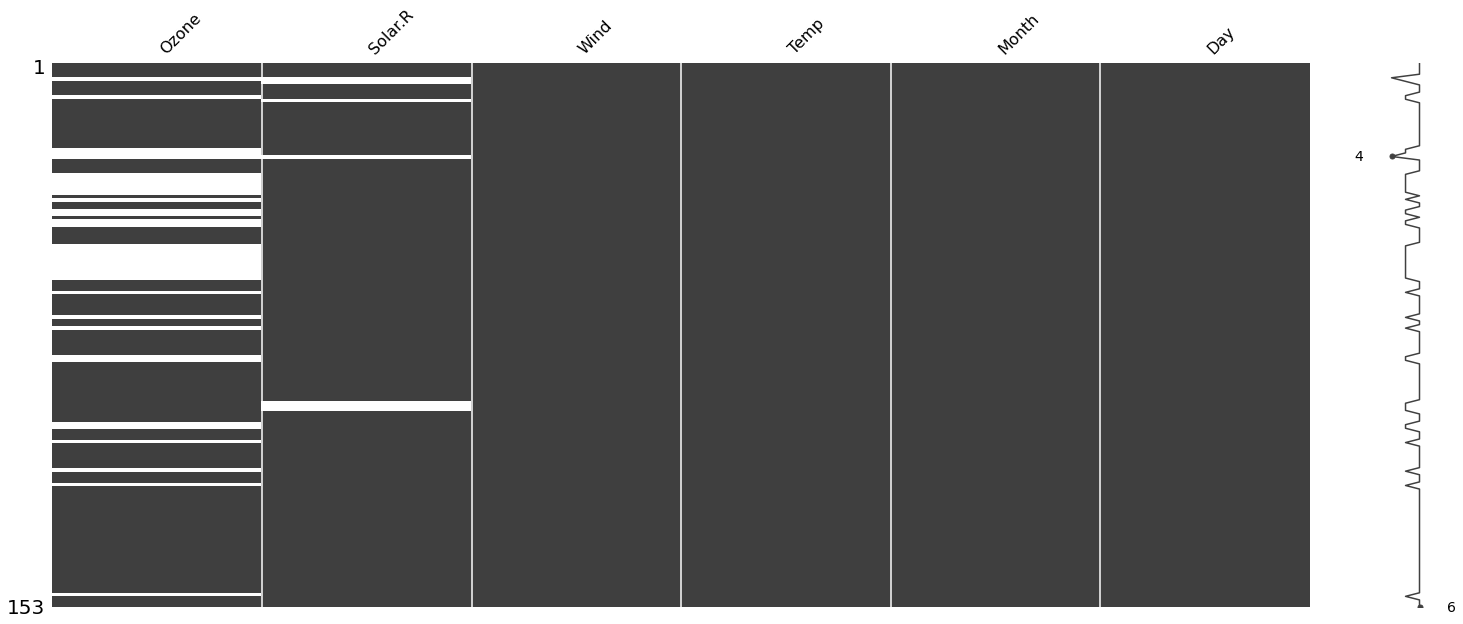

In [5]:
#라이브러리를 사용하여 결측치를 표현
%matplotlib inline
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
#흰색: 결측값,  
#스파크라인 - 각 샘플의 데이터 완성도를 표현

#데이터가 정규분포- 평균/ 비정규분포-중위수, 범주형변수-최빈수

[결측치 처리]
* 데이터가 정규분포일 때: 평균
* 데이터가 비정규분포일 때: 중위수
* 데이터가 범주형 변수 일때: 최빈수

In [6]:
#결측값을 Scikit-Learn에서 제공하는 라이브러리를 이용해서 처리(mean값 이용)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [7]:
#변수 지정
X = df[['Solar.R', 'Wind', 'Temp']] #독립변수
y = df['Ozone'] #종속변수

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    float64
 4   Month    153 non-null    float64
 5   Day      153 non-null    float64
dtypes: float64(6)
memory usage: 7.3 KB


#스케일을 정규화하여 스케일 조정이 성능에 영향을 미치는 지 확인한다.

[참고] 스케일 조정이 필요한 경우

       1. 분석때 변수들의 스케일이 너무 다를 경우
       
       2. 신경망 학습때, 데이터 셋의 값이 들쑥날쑥하거나, 
          매우 큰 경우에는 cost의 값이 발산하여 정상적인 학습이 이루어지지 않아 문제가 생길 수 있다.
          이런 경우에 스케일 조정으로 해결할 수 있다.

[sklearn에서 제공하는 스케일러]
1. #StandardScaler
2. #MinMaxScaler
3. #RobustScaler
4. #Normalizer

**[1번]데이터 스케일링 없이 수행**

**[분석 조건]**

* 알고리즘: LinearRegression
* 데이터 셋: 153 rows X 6 columns
* 결측량: 4.79%
* 데이터 셋: 훈련 80%, 테스트: 20%
* 데이터 셋: 스케일링 변환없이 진행
* 모델 평가방법: score 출력(R2값) / MSE값/ RMSE값 /기울기값과 절편값


In [33]:
from sklearn.model_selection import train_test_split 
#lr: 알고리즘이 적용된 모델명
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2)

# train 데이터를 사용하여 훈련
lr.fit(Xtrain,ytrain)

#훈련 데이터의 정확도
print(lr.score(Xtrain, ytrain))

#테스트 데이터의 정확도
print(lr.score(Xtest, ytest))

#기울기와 절편 출력
print(lr.intercept_,lr.coef_)

0.48626716208026177
0.4093005381897121
-24.982259182522803 [ 0.04643547 -3.17940702  1.16877281]


**[분석결과]**

 과소적합
 
 결과 수치의 해석
 MSE:
 RMSE:
 Score(R2):

**[2번]데이터 standardscaler 사용**

**[분석 조건]**

* 알고리즘: LinearRegression
* 데이터 셋: 153 rows X 6 columns
* 결측량: 4.79%
* 데이터 셋: 훈련 80%, 테스트: 20%
* 데이터 셋: 스케일링:StandardScaler
* 모델 평가방법: score 출력(R2값) / MSE값/ RMSE값


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    float64
 4   Month    153 non-null    float64
 5   Day      153 non-null    float64
dtypes: float64(6)
memory usage: 7.3 KB


In [48]:
from sklearn.model_selection import train_test_split 
#lr: 알고리즘이 적용된 모델명
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

#데이터 스케일링 조절: 정규화
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()

#StandardScaler로 훈련데이터(독립변수만) 훈련
scaler.fit(Xtrain)

#훈련데이터 스케일링 적용(독립변수만 적용)
train_scaled = scaler.transform(Xtrain)

#테스트 데이터 스케일링(독립변수만 적용)
test_scaled = scaler.transform(Xtest)

# train 데이터를 사용하여 훈련()
lr.fit(train_scaled, ytrain)

#훈련 데이터의 정확도
print(lr.score(train_scaled, ytrain))

#테스트 데이터의 정확도
print(lr.score(test_scaled, ytest))
print(lr.intercept_,lr.coef_)

0.4735263074403241
0.4989947227530651
42.407786885245905 [ 4.4637745  -9.66293949 11.73824695]


**[분석결과]**

 과소적합

[3번]데이터 MinMaxScaler 사용

[분석 조건]

알고리즘: LinearRegression

데이터 셋: 153 rows X 6 columns

결측량: 4.79%

데이터 셋: 훈련 80%, 테스트: 20%

데이터 셋: 스케일링:MinMaxScaler

모델 평가방법: score 출력(R2값) / MSE값/ RMSE값

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    float64
 4   Month    153 non-null    float64
 5   Day      153 non-null    float64
dtypes: float64(6)
memory usage: 7.3 KB


In [44]:
from sklearn.model_selection import train_test_split 

# 데이터 트레이닝: 80, 테스트: 20 
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

#데이터 스케일링 조절: 정규화
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
#MinMaxScaler로 데이터 셋트 변환, fit()과  transform() 호출
MinMax = MinMaxScaler()

MinMax.fit(Xtrain)
Min_train_scaled = MinMax.transform(Xtrain)
Min_test_scaled = MinMax.transform(Xtest)

# train 데이터를 사용하여 훈련
lr.fit(Min_train_scaled, ytrain)

#훈련 데이터의 정확도
print(lr.score(Min_train_scaled, ytrain))

#테스트 데이터의 정확도
print(lr.score(Min_test_scaled, ytest))
#테스트 데이터의 정확도
print(lr.score(test_scaled, ytest))
print(lr.intercept_,lr.coef_)


0.4735263074403242
0.4989947227530648
-2.9701305158192786
29.156945458644095 [ 16.85813209 -50.41746166  49.78748736]


##############[모델 구성: OLS알고리즘]###################################

#테스트 데이터 scaled train, test

In [45]:
#OLS 알고리즘을 사용하기 위해 import
import statsmodels.api as sm

In [46]:
#전달이 사이킷런 알고리즘들과 다르다.
#알고리즘 OLS에 데이터 전달이 * (y,X) 주의
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              246.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                    9.03e-58
Time:                        23:27:24   Log-Likelihood:                         -682.21
No. Observations:                 153   AIC:                                      1370.
Df Residuals:                     150   BIC:                                      1380.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0600      0.020      2.969      0.003       0.020       0.100
Wind          -3.4514      0.408     -8.459      0.000      -4.258      -2.645
Temp           0.8430      0.071     11.820      0.000       0.702       0.984
==============================================================================
Omnibus:                       40.837   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.840
Skew:                           1.210   Prob(JB):                     4.60e-18
Kurtosis:                       5.581   Cond. No.                         52.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[LS 분석 결과 해석]

회귀 분석 결과에서 나오는 주요 결과물들의 설명을 아래와 같다.
-Dep.Variable: Dependent Variable,종속변수를 의미
-Model:모델링 방법(OLS: Ordinary Least Squares)
-Df Residuals: DF는 Degree of Freedom으로 자유도를 뜻하는데, 
-DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구한다.
-Df Model: 독립변수의 개수이다.
-R squared: R의 제곱이라는 뜻이고 결정계수를 의미한다.
 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타낸다. SSTr/SST이나 상관계수 R을 제곱해서 구할 수 있다. (상세 내용은 본 포스팅 #4.에서 추가설명 한다)
-F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다. (상세 내용은 본 포스팅 #5. 에서 추가설명 한다)
-Prob: F통계량에 해당하는 P-value를 의미한다. P는 Probability의 첫글자이다.
[회귀계수]: 다음 두 값은 해당 모델의 회귀계수들이다.
-Intercept coef: Intercept coefficient는 회귀식의 절편 값을 의미한다.
-speed coef: 독립변수 coefficient는 독립변수 "speed"의 회귀계수를 의미하며, 회귀식에서 기울기를 의미한다. 
  --> 위의 회귀계수들을 활용해 다음과 같이 회귀식을 수기로 작성할 수 있다.
  --> y = 3.9324X -17.5791